# Import Package

In [129]:
import pandas as pd
from datetime import datetime
from datetime import date
import numpy as np
import dataframe_image as dfi
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
from scipy import stats

pd.set_option("display.max_columns", None)
pd.set_option('display.expand_frame_repr', False)

# 全部資料EDA

## Member Data

In [130]:
# import data
member = pd.read_csv('91APP_MemberData.csv')
member_label = pd.read_csv('調整後_Member_omoScore.csv')

member['MemberCardLevel'][member['MemberCardLevel'] == 0] = np.nan

# convert some column to right data type
for col in ['RegisterSourceTypeDef', 'Gender', 'MemberCardLevel']:
    member[col] = member[col].astype('category')
member_label['label'] = member_label['label'].astype('category').cat.set_categories(['P', 'A', 'V'])


# calculate age
def calculate_age(born):
        born = datetime.strptime(born, "%Y-%m-%d").date()
        today = date.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
member['age'] = member['Birthday'].apply(calculate_age)
member['age'][(member['age'] > 100) | (member['age'] <= 10)] = np.nan

# delete the first cloumn in member_omo_label(Unnamed: 0)
member_label = member_label.drop('Unnamed: 0',axis=1)

print(member.shape)  # (377160, 10)
print(member_label.shape)  # (37720, 9)

/root/notebooks/test/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(377160, 11)
(37720, 9)


/root/notebooks/test/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [132]:
# whether exists duplicate MemberID
member.MemberID.value_counts()
member = member.drop_duplicates(subset = ['MemberID'], keep = False)

# merge member and member_label(by MemberID)
member_all= pd.merge(member, member_label, on='MemberID', how='inner')

print(member_all.shape)  # (37719, 18)
member_all.head(5)

(37719, 19)


,MemberID,RegisterSourceTypeDef,RegisterDateTime,Gender,Birthday,IsAppInstalled,IsEnableEmail,IsEnablePushNotification,IsEnableShortMessage,MemberCardLevel,age,p_count,a_count,v_count,total_num,TotalSales,avg_sales,omo_score,label
0,TfAx+sUg7evCS/NyMlJTSNEZCo+MqHs51e2l6DOcuTU=,iOSApp,2016-05-29 00:32:34.277,Female,1990-12-14,True,True,True,True,10.0,30.0,0,0,1,1,3210.0,3210.0,1.275411,V
1,KbZxzRI3zi6aE8sf7b+iPB3HiYp2lzWSsmwDJWT7ze0=,iOSApp,2016-02-28 13:33:10.503,Female,1994-10-07,True,False,True,True,20.0,26.0,0,0,2,2,5393.0,2696.5,2.245428,V
2,UbYrHTlwPRgDrfqfn4NAPuDd3CfOtKMyxLrSqzd+8I8=,NaN,2014-10-26 22:05:03.887,Female,1988-07-04,True,True,True,True,20.0,32.0,1,0,1,2,3192.0,1596.0,1.676979,V
3,NJKOdvlYJXiuGqjCKeHocC0TLA0XC3nkiXoxDSPPGws=,iOSApp,2016-07-30 01:52:42.550,Female,1988-06-05,True,True,True,True,20.0,33.0,0,0,1,1,1881.0,1881.0,1.356124,V
4,Yqrrud14NsTKfwQsFpIpmgr6KbqfbiaA1m0Q0p7z6w8=,NaN,2014-01-24 17:47:00.147,Female,1992-05-02,True,False,True,True,30.0,29.0,0,0,4,4,9190.0,2297.5,5.599159,V


In [105]:
member_all['MemberCardLevel'].describe()

In [234]:
member_all[member_all['MemberCardLevel'] == 10]

,MemberID,RegisterSourceTypeDef,RegisterDateTime,Gender,Birthday,IsAppInstalled,IsEnableEmail,IsEnablePushNotification,IsEnableShortMessage,MemberCardLevel,age,p_count,a_count,v_count,total_num,TotalSales,avg_sales,omo_score,label
0,TfAx+sUg7evCS/NyMlJTSNEZCo+MqHs51e2l6DOcuTU=,iOSApp,2016-05-29 00:32:34.277,Female,1990-12-14,True,True,True,True,10.0,30.0,0,0,1,1,3210.0,3210.0,1.275411,V
5,tyfFhkRjrYlSB5mUN3vYVCdAbPp6MmS9xXggKfBsbNw=,iOSApp,2016-04-03 20:25:32.873,Female,1989-07-28,True,True,True,True,10.0,31.0,1,0,0,1,1280.0,1280.0,0.370871,P
6,6gjVEFRq3zGzYbWYkc0UlJAPyBy/2ZMc1OQBuARjaYA=,AndroidApp,2016-08-28 16:15:31.047,Female,1991-07-26,True,True,True,True,10.0,29.0,0,1,0,1,1380.0,1380.0,0.926628,P
8,mdzH9/U/58gG8SLsuDn8JnVvpBg0pKDkDN7R9xBFKWM=,AndroidApp,2015-11-01 02:10:59.603,Female,1985-10-12,True,True,True,True,10.0,35.0,0,0,2,2,3060.0,1530.0,2.318150,V
9,N4+pSE7hPe+Mv8cHgkp+F/zN3elQpvBZacnTplM0hmk=,Web,2016-10-06 20:38:33.043,Female,1992-02-12,True,True,True,True,10.0,29.0,0,0,2,2,3560.0,1780.0,2.256116,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37714,m+sRaVdjTOpoWN+74HeakuMJ8jwZaauEWEoVl/0f6Qg=,LocationWizard,2021-04-18 20:56:52.453,NaN,1900-01-01,True,True,True,True,10.0,NaN,1,0,0,1,1880.0,1880.0,0.612194,P
37715,fonAHRHQu0IViiCn9ZIYzl9Fxzpe4tPyOt+l2Ch0d08=,LocationWizard,2021-04-22 16:13:39.240,Female,1999-10-25,True,True,True,True,10.0,21.0,1,0,0,1,1380.0,1380.0,0.628510,P
37716,RUIo0RpqgmaC3+sWhZ1D3KKVf6ToMObTURMW9r3K5pQ=,LocationWizard,2021-04-25 21:43:07.680,NaN,1900-01-01,True,True,True,True,10.0,NaN,1,0,1,2,5190.0,2595.0,2.585468,V
37717,w0i4G85XFKEky/bpn55HlByHA4NOGhOAPPNWAk8M5tI=,LocationWizard,2021-04-26 21:01:37.063,Female,1994-07-02,True,True,True,True,10.0,26.0,1,0,0,1,3180.0,3180.0,0.647640,P


In [33]:
# 相關係數圖
# df_dummies = pd.get_dummies(member_all, columns=['RegisterSourceTypeDef', 'Gender', 'MemberCardLevel', 'label'],dummy_na=False)

# corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
# dfi.export(corr_member_omo_label, 'corr.png')

# corr = member_all.corr()

# plt.figure(figsize = (18 , 10))
# mask = np.triu(np.ones_like(corr,dtype = bool))
# plt.title('Correlation Analysis')
# sns.heatmap(corr,mask=mask,annot=True,lw=1,linecolor='white')
# plt.xticks()
# plt.yticks()
# plt.show()

## For All Data

In [71]:
member_all.groupby(['label'])['omo_score'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
P,10929.0,0.635407,0.344477,0.368643,0.404168,0.470843,0.798150,4.561995
A,1030.0,1.456758,0.805180,0.737286,0.805519,1.025367,2.126951,8.395522
V,25760.0,2.812068,2.863518,1.107309,1.340455,2.306347,3.193268,130.702674


V
(0.9015359184968188, 0.0)
P
(0.3940125461207318, 0.0)
A
(0.33117529163209286, 8.706952784464953e-28)


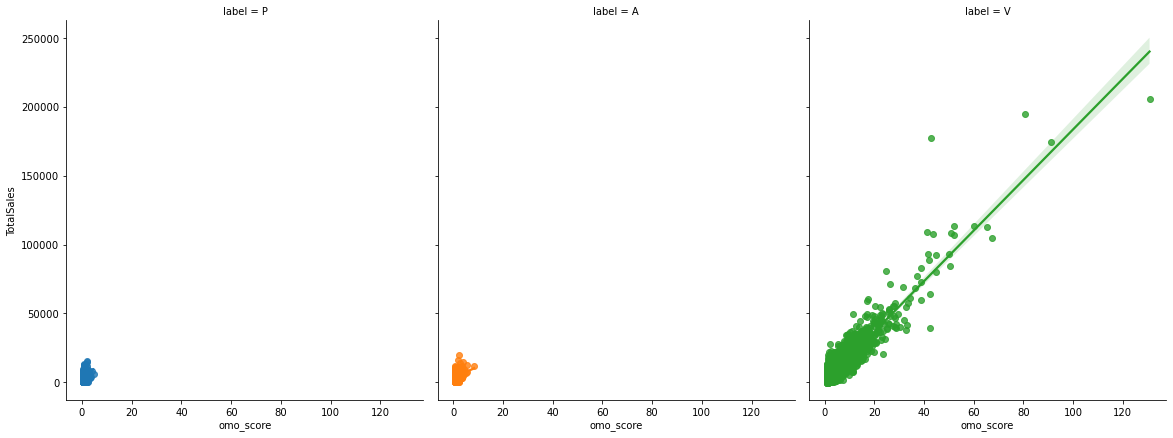

In [19]:
sns.lmplot(x="omo_score", y="TotalSales", hue="label", col="label",
               data=member_all, height=6, aspect=.9, x_jitter=.1)
for i in member_all['label'].unique():
    print(i)
    print(sp.stats.pearsonr(member_all[member_all['label']==i]['omo_score'], member_all[member_all['label']==i]['TotalSales']))

### Gender and Age

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
P,7966.0,30.561009,7.282221,12.0,26.0,29.0,34.0,78.0
A,854.0,31.392272,7.121915,16.0,27.0,30.0,35.0,63.0
V,22573.0,31.290923,7.215139,12.0,26.0,30.0,35.0,88.0


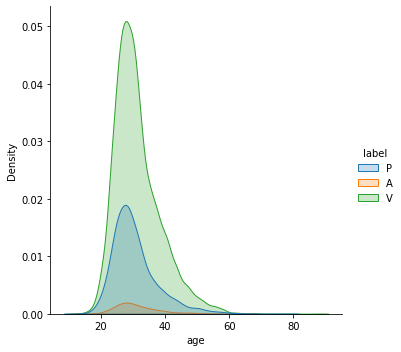

In [157]:
# create table for each group's Gender
gender_size = member_all.groupby(['label','Gender']).size()

# pie chart for each group's Gender
gender_size.plot(kind='pie',startangle=90, figsize=(10,10), autopct="%1.1f%%", textprops={'fontsize': 8})
plt.title('Gender' + ' Perchntage(%) for each group', loc = 'center')
plt.show()
print(gender_size/gender_size.sum())


# create describe for each group's age
member_all.groupby(['label'])['age'].describe()

# density plot for each group's age
sns.displot(member_all, x="age", hue="label", kind="kde", fill=True)

### size and TotalSales

In [91]:
# create table for each group's size and TotalSales
each_group = pd.DataFrame()
each_group['size'] = member_all.groupby(['label']).size()
each_group['size_percentage(%)'] = each_group['size'] / each_group['size'].sum() * 100
each_group['TotalSales'] = member_all.groupby(['label'])['TotalSales'].sum()
each_group['TotalSales_percentage(%)'] = each_group['TotalSales'] / each_group['TotalSales'].sum() * 100
each_group['average_TotalSales'] = each_group['TotalSales'] / each_group['size']
each_group

,size,size_percentage(%),TotalSales,TotalSales_percentage(%),average_TotalSales
label,,,,,
P,10929,28.974787,27891386.3,16.914633,2552.052914
A,1030,2.730719,4229509.0,2.564971,4106.319417
V,25760,68.294493,132774116.2,80.520396,5154.274697


### Is or Not

In [165]:
# pie chart(全部拿來比,Q:subplots)
each_group_is = pd.DataFrame()
index = 0
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(50,50))
# plt.figure(figsize = (18 , 10))
for col in ['IsAppInstalled', 'IsEnableEmail', 'IsEnablePushNotification', 'IsEnableShortMessage']:  
    each_group_is[col+'(%)'] = member_all.groupby(['label'])[col].value_counts() / member_all[col].value_counts().sum() * 100    
    each_group_is[col+'(%)'].plot(ax=axes[index], kind='pie', subplots=True, startangle=90, autopct="%1.1f%%")
    plt.title(str(col) + ' Perchntage(%) for each group', loc = 'center')
    index += 1
plt.show()
print(each_group_is)

# pie chart for each group's MemberCardLevel
MemberCardLevel = pd.DataFrame()
MemberCardLevel['count'] = member_all.groupby(['label'])['MemberCardLevel'].value_counts()
MemberCardLevel['MemberCardLevel(%)'] = member_all.groupby(['label'])['MemberCardLevel'].value_counts()/member_all['MemberCardLevel'].value_counts().sum() * 100
MemberCardLevel['MemberCardLevel(%)'].plot(kind='pie',startangle=90, figsize=(15,10), autopct="%1.1f%%")
plt.title('MemberCardLevel' + ' Perchntage(%) for each group', loc = 'center')
plt.show()
print(MemberCardLevel)

# # pie chart for each group is_or_not(subplot)
# index_title = ['P','A','V']
# for col in ['IsAppInstalled', 'IsEnableEmail', 'IsEnablePushNotification', 'IsEnableShortMessage','MemberCardLevel']:
#     graph = member_all.groupby([col,'label']).size().unstack(fill_value=0)
#     print(graph)    
#     data = []
#     for index in range(len(index_title)):
#         for x in graph[index_title[index]]:
#             data.append(x)
#     graph.plot(data,kind='pie', subplots=True,startangle=90, figsize=(15,10), autopct=lambda pct: "{:.1f}%\n({})".format(pct,data.pop(0)))
#     plt.title(str(col) + ' Perchntage(%) for each group', loc = 'center')
#     plt.show()

IsAppInstalled(%)  IsEnableEmail(%)  IsEnablePushNotification(%)  IsEnableShortMessage(%)
label IsAppInstalled                                                                                           
P     True                    25.819879         25.742994                    28.608924                28.688459
      False                    3.154909          3.231793                     0.365863                 0.286328
A     True                     2.534532          2.330391                     2.696254                 2.701556
      False                    0.196188          0.400329                     0.034465                 0.029163
V     True                    67.358626         55.937326                    66.775365                67.040484
      False                    0.935868         12.357167                     1.519128                 1.254010

# 對於label=V進行EDA

In [5]:
v = member_all[member_all['label'] == 'V']

## 會員資料

(0.6897700328024394, 0.0)
(0.7676003398818141, 0.0)
(0.9386041911128096, 0.0)
(0.957730851189567, 1.4286475708843335e-51)


C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-9-14de8d679a98>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v['TotalSales_log'] = np.log10(v['TotalSales'])


MemberCardLevel
10.0    20433
20.0     4006
30.0     1227
40.0       94
dtype: int64

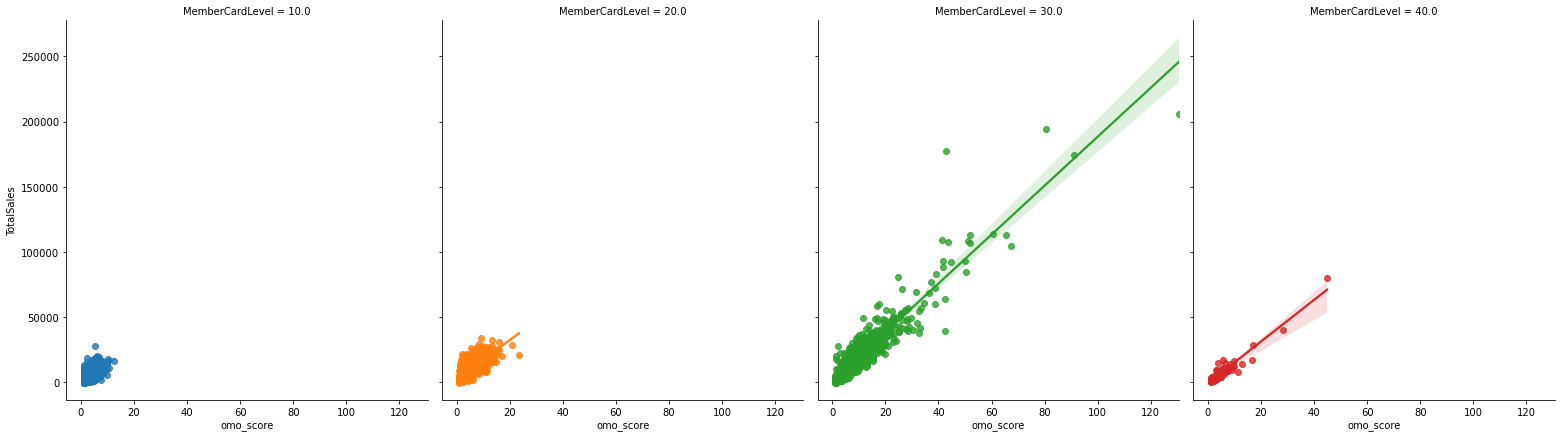

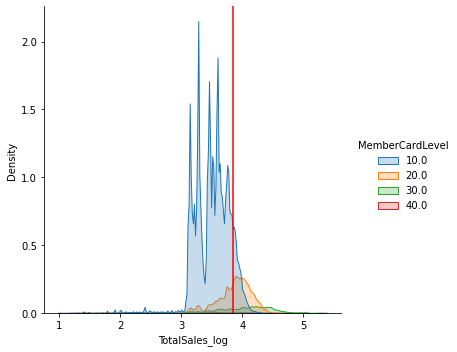

In [9]:
# v的所有會員等級的消費金額分布
sns.lmplot(x="omo_score", y="TotalSales", hue="MemberCardLevel", col="MemberCardLevel",
               data=v, height=6, aspect=.9, x_jitter=.1)
for i in v['MemberCardLevel'].unique():
    print(stats.pearsonr(v[v['MemberCardLevel']==i]['omo_score'], v[v['MemberCardLevel']==i]['TotalSales']))

# Label V的會員等級與總消費金額的分布情形
v['TotalSales_log'] = np.log10(v['TotalSales'])
sns.displot(v[np.isfinite(v['TotalSales_log'])], x="TotalSales_log", hue="MemberCardLevel", kind="kde", fill=True, bw_adjust=.25)
plt.axvline(v['TotalSales_log'].quantile(0.8),color='r')

v.groupby(['MemberCardLevel']).size()

<AxesSubplot:xlabel='age', ylabel='MemberCardLevel'>

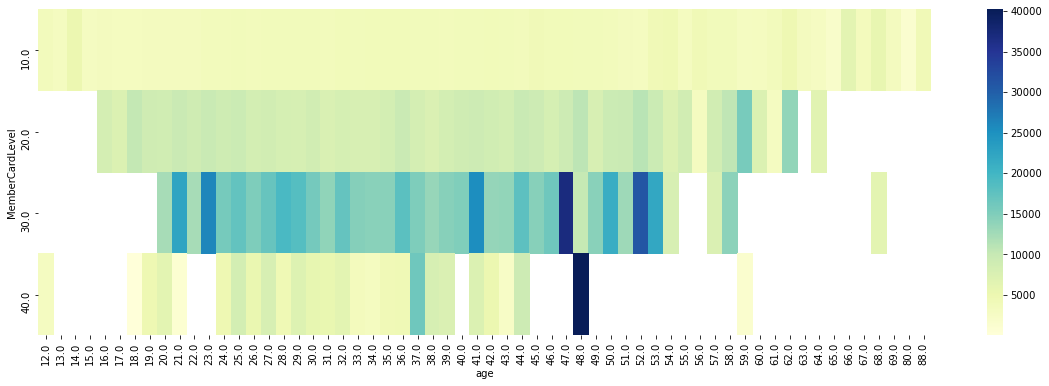

In [214]:
# 熱圖：x年齡跟會員等級，y消費金額
plt.figure(figsize=(20, 6))
df2 = v[['age','TotalSales', 'MemberCardLevel','omo_score']]
heatmap2_data = pd.pivot_table(df2,values='TotalSales', index=['MemberCardLevel'], columns='age')
# Normalize it by row:
df_norm_row = heatmap2_data.apply(lambda x: (x-x.mean())/x.std(), axis = 1)
sns.heatmap(heatmap2_data, cmap="YlGnBu")

## 購買行為

In [133]:
order = pd.read_csv('91APP_OrderData.csv')
order = order[order['TradesDateTime'] > '2019-12-31']
order['TradesDateTime'] = order['TradesDateTime'].str[0:10]
order['TradesDate'] = pd.to_datetime(order['TradesDateTime'], format='%Y-%m-%d')
order['Weekday'] = order['TradesDate'].dt.strftime("%a")

# removing unreasonable data
order_nocancel = order.groupby(['MemberID','TradesGroupCode','TradesDate','Weekday'], as_index=False)[['TotalSalesAmount', 'Qty']].sum()
order_nocancel = order_nocancel[(order_nocancel['TotalSalesAmount'] > 0) & (order_nocancel['Qty'] > 0)]
order_nocancel.head(5)
order_nocancel.shape


# Member Data Label = v
v = v[['MemberID', 'Gender', 'MemberCardLevel', 'age', 'TotalSales', 'avg_sales', 'omo_score', 'label']]
v_order= pd.merge(order_nocancel, v, on='MemberID', how='inner')
v_order.head(5)

/root/notebooks/test/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



,MemberID,TradesGroupCode,TradesDate,Weekday,TotalSalesAmount,Qty,Gender,MemberCardLevel,age,TotalSales,avg_sales,omo_score,label
0,++IF7os8by8KfG5kfINks33LjouElLqox3KgnULQqCw=,1520200930017,2020-09-30,Wed,2100.0,4,Female,10.0,31.0,2100.0,2100.000000,1.257542,V
1,++P3hhogUcwlFXNq/N/+F9UFR+XcIHzrhS82Nu5PqD8=,0520200222013,2020-02-22,Sat,2864.0,5,Female,30.0,48.0,15118.0,3023.600000,6.070701,V
2,++P3hhogUcwlFXNq/N/+F9UFR+XcIHzrhS82Nu5PqD8=,0520201212017,2020-12-12,Sat,5216.0,6,Female,30.0,48.0,15118.0,3023.600000,6.070701,V
3,++P4RiS8hWd2YNbXLhX2W4gw8Lcej7VkkkiB5AjrKHs=,A120201215015,2020-12-15,Tue,1880.0,2,Female,10.0,25.0,9200.0,3066.666667,4.058694,V
4,++P4RiS8hWd2YNbXLhX2W4gw8Lcej7VkkkiB5AjrKHs=,A120201218026,2020-12-18,Fri,1880.0,2,Female,10.0,25.0,9200.0,3066.666667,4.058694,V


TotalSalesAmount    254966.895688
dtype: float64


/root/notebooks/test/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



,TradesDate,TotalSalesAmount
316,2020-11-11,1168437.0
318,2020-11-13,795037.0
467,2021-04-11,782225.0
305,2020-10-31,694208.0
466,2021-04-10,691475.0


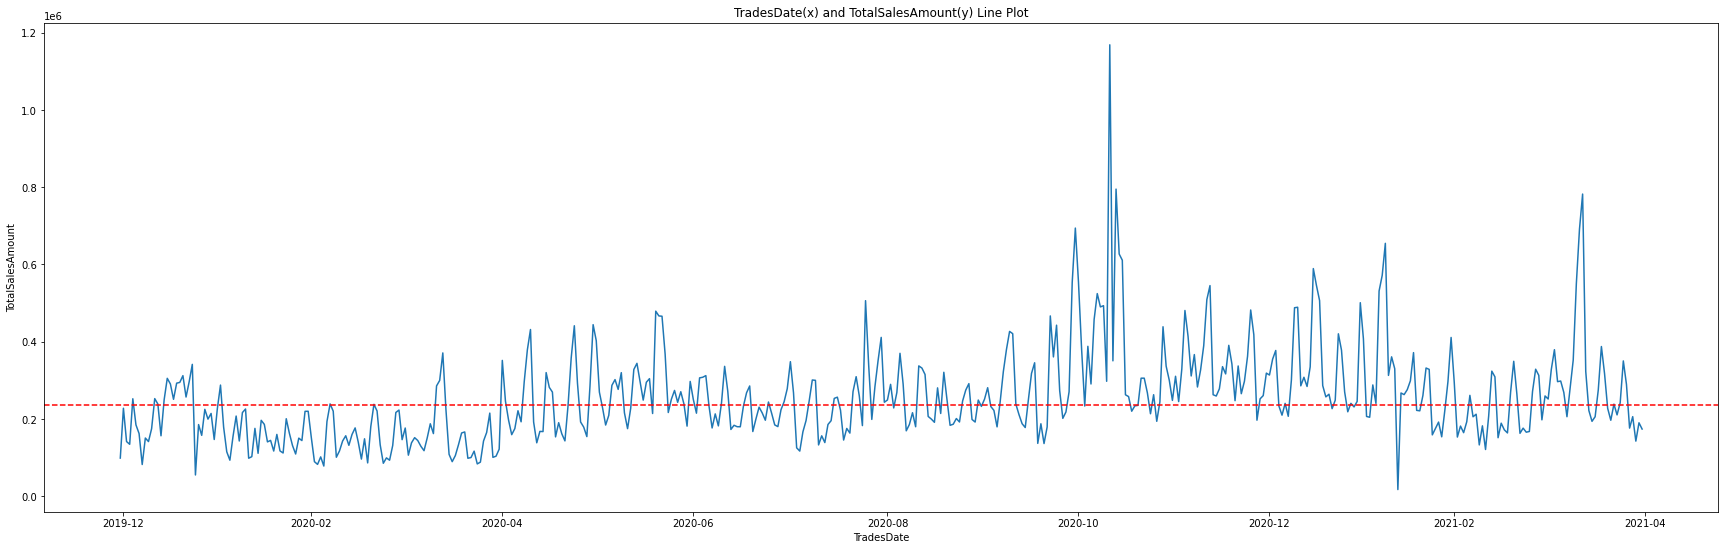

In [153]:
# Label V的日期與總消費金額折線圖
plt.figure(figsize=(30,9))
v_label_month = v_order.groupby(['TradesDate'], as_index = False)['TotalSalesAmount'].sum()
sns.lineplot(data = v_label_month, x = "TradesDate", y = "TotalSalesAmount").set(title="TradesDate(x) and TotalSalesAmount(y) Line Plot")
plt.axhline(v_label_month['TotalSalesAmount'].quantile(0.5),color='r', ls='--')
print(v_label_month.mean())
v_label_month.sort_values(by='TotalSalesAmount', ascending=False).head(5)

TotalSalesAmount    1.773841e+07
dtype: float64


,Weekday,TotalSalesAmount
2,Sat,23423009.0
3,Sun,22238419.0
0,Fri,19543936.0
6,Wed,15753831.0
1,Mon,14900455.0
4,Thu,14242154.2
5,Tue,14067074.0


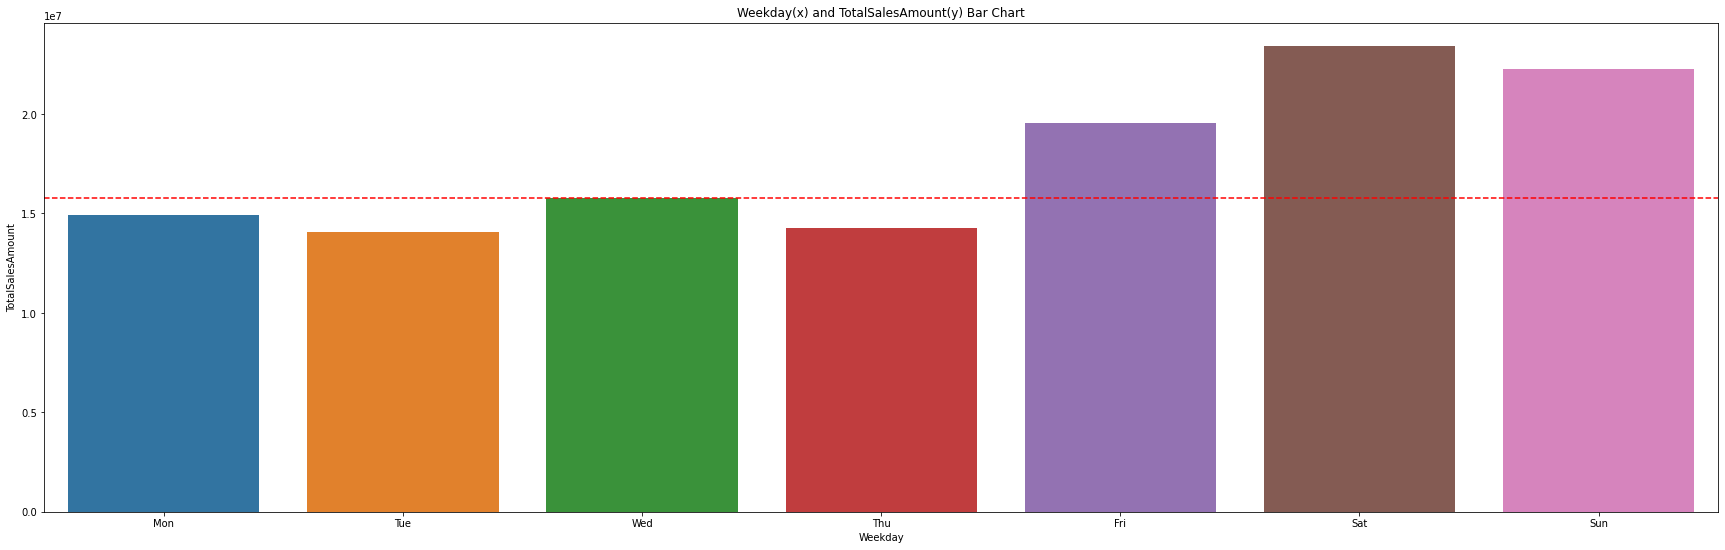

In [154]:
# Label V的星期與總消費金額折線圖
plt.figure(figsize=(30,9))
v_label_weekday = v_order.groupby(['Weekday'], as_index = False)['TotalSalesAmount'].sum()
sns.barplot(data = v_label_weekday, x = "Weekday", y = "TotalSalesAmount", ci=0,
           order=["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]).set(title="Weekday(x) and TotalSalesAmount(y) Bar Chart")
plt.axhline(v_label_weekday['TotalSalesAmount'].quantile(0.5),color='r', ls='--')
print(v_label_weekday.mean())
v_label_weekday.sort_values(by='TotalSalesAmount', ascending=False)